In [5]:
# This file focus on the analyzing the top suicide rate of different countries
# 1. Find out the top 5 countries with highest youth suicide rate 

import os
import math
import pandas as pd
import matplotlib.pyplot as plt

import analysis

import sys
sys.path.append(os.path.join("..", ".."))
from analysis.common_lib.data_reader import SuicideDataReader, SuicideRawData, SuicideProcessedData

In [6]:
# ========= Getting Data =========

data_reader = SuicideDataReader()

suicide_rates_dataframe = data_reader.read_data(SuicideProcessedData.SUICIDE_RATES)
print(suicide_rates_dataframe)

country_facilities_dataframe = data_reader.read_data(SuicideProcessedData.FACILITIES)
print(country_facilities_dataframe)

     unnamed: 0      country         sex  80_above  70to79  60to69  50to59  \
0             0  Afghanistan  Both sexes      42.0    11.0     5.5     5.6   
1             1  Afghanistan        Male      70.4    20.9     9.8     9.3   
2             2  Afghanistan      Female      20.1     2.3     1.4     1.6   
3             3      Albania  Both sexes      16.3     8.3     6.0     7.8   
4             4      Albania        Male      23.2    11.9     8.1    11.4   
..          ...          ...         ...       ...     ...     ...     ...   
544         544       Zambia        Male     152.1    79.0    38.7    27.3   
545         545       Zambia      Female      31.2    26.4    16.0    11.2   
546         546     Zimbabwe  Both sexes     205.7    81.5    41.3    29.4   
547         547     Zimbabwe        Male     285.0   111.5    62.8    47.0   
548         548     Zimbabwe      Female     152.4    59.4    26.4    16.0   

     40to49  30to39  20to29  10to19  
0       6.6     9.2    10

In [8]:
# ========= Prepare Data =========
# join country facilities to suicde rate data
suicide_rates_facilities_dataframe = suicide_rates_dataframe.merge(country_facilities_dataframe, how="left", left_on="country", right_on="country")

# Sorting and pick the first 5
top_five_youth_suicide_rates_dataframe = suicide_rates_facilities_dataframe.sort_values(by=["10to19"], ascending=False).head(5)

# print the results
print(top_five_youth_suicide_rates_dataframe)

     unnamed: 0_x   country         sex  80_above  70to79  60to69  50to59  \
262           262  Kiribati        Male      71.0    30.5    23.5    17.6   
223           223   Iceland        Male       0.0    12.2    37.4    17.7   
212           212    Guyana      Female       0.0     9.9    13.2    19.1   
210           210    Guyana  Both sexes      38.6    29.8    31.7    46.6   
211           211    Guyana        Male      91.4    53.6    52.1    73.8   

     40to49  30to39  20to29  10to19  unnamed: 0_y    year  mental_hospitals  \
262    19.7    30.2    57.4    24.2           NaN     NaN               NaN   
223    38.2    30.5    25.1    21.2          45.0  2016.0             0.303   
212    21.8    15.0    19.3    18.4          42.0  2016.0             0.130   
210    54.8    40.0    38.0    18.3          42.0  2016.0             0.130   
211    86.5    66.2    56.0    18.2          42.0  2016.0             0.130   

     health_units  outpatient_facilities  day_treatment  \
262

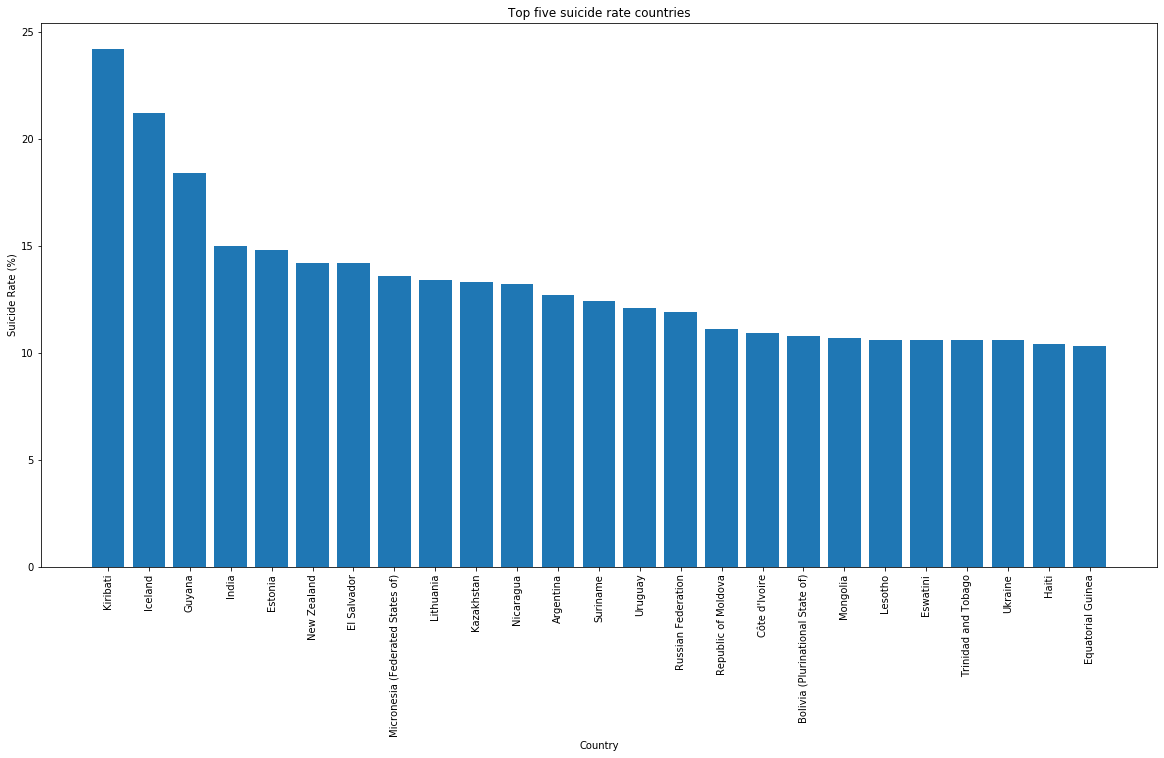

In [13]:
# ========= plot graph =========
top_suicide_rates_country_dataframe = suicide_rates_facilities_dataframe[suicide_rates_facilities_dataframe["10to19"] > 10].sort_values(by=["10to19"], ascending=False)

# top suicide rate plot
plt.figure(figsize=(20,10))
plt.bar(top_suicide_rates_country_dataframe["country"], top_suicide_rates_country_dataframe["10to19"])
plt.title("Top five suicide rate countries")
plt.xlabel("Country")
plt.ylabel("Suicide Rate (%)")
plt.xticks(rotation=90)
plt.show()

<Figure size 1440x720 with 0 Axes>

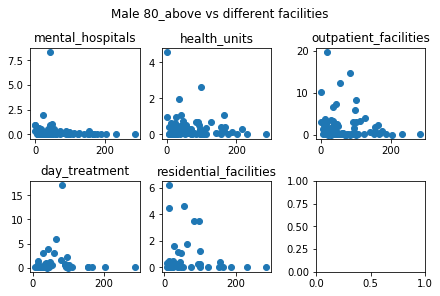

<Figure size 1440x720 with 0 Axes>

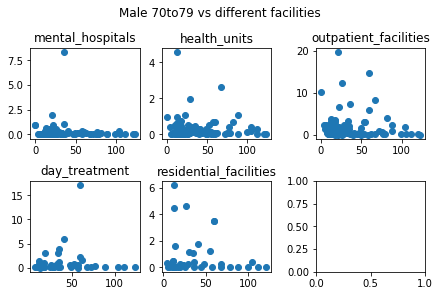

<Figure size 1440x720 with 0 Axes>

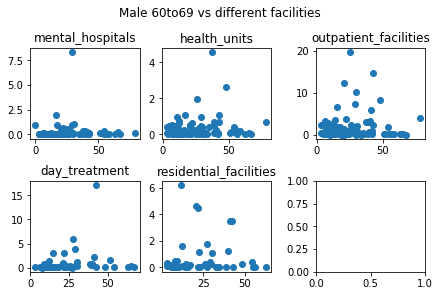

<Figure size 1440x720 with 0 Axes>

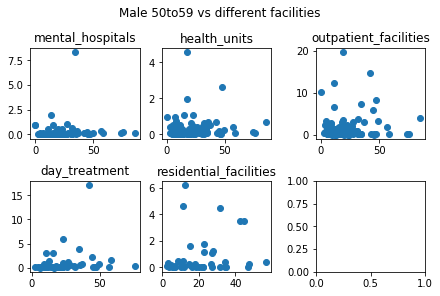

<Figure size 1440x720 with 0 Axes>

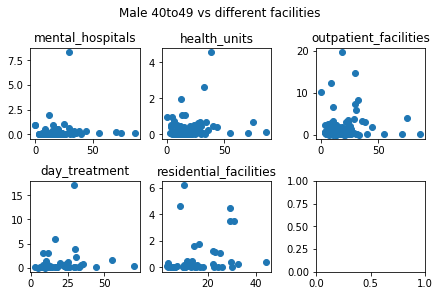

<Figure size 1440x720 with 0 Axes>

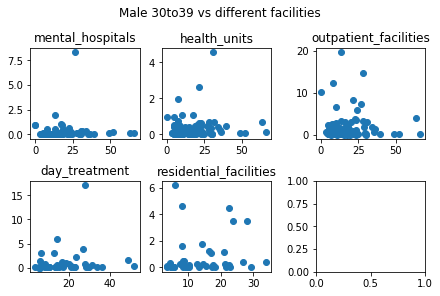

<Figure size 1440x720 with 0 Axes>

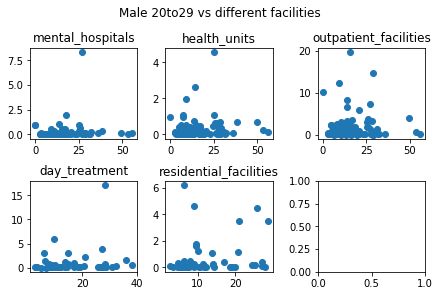

<Figure size 1440x720 with 0 Axes>

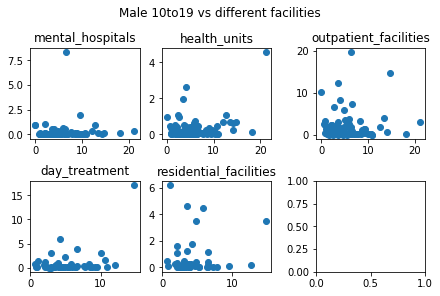

<Figure size 1440x720 with 0 Axes>

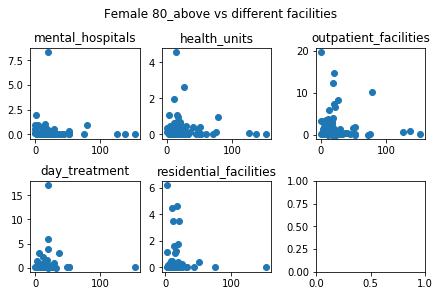

<Figure size 1440x720 with 0 Axes>

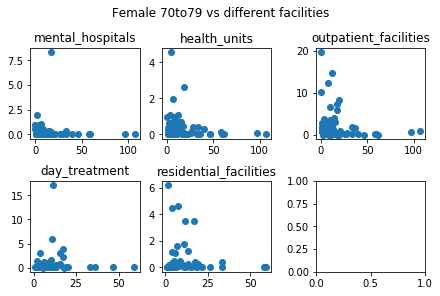

<Figure size 1440x720 with 0 Axes>

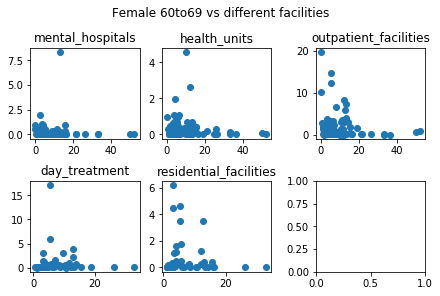

<Figure size 1440x720 with 0 Axes>

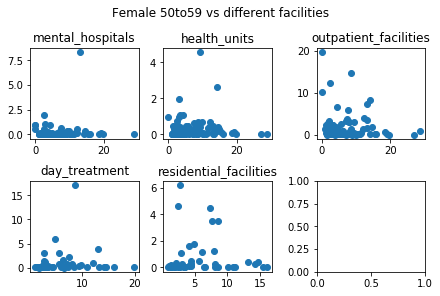

<Figure size 1440x720 with 0 Axes>

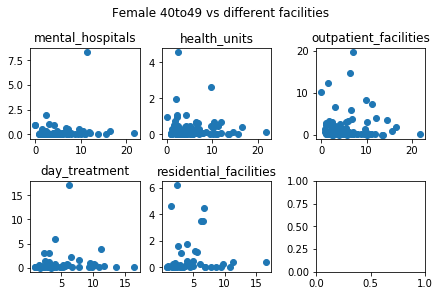

<Figure size 1440x720 with 0 Axes>

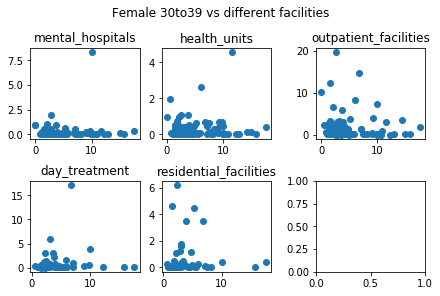

<Figure size 1440x720 with 0 Axes>

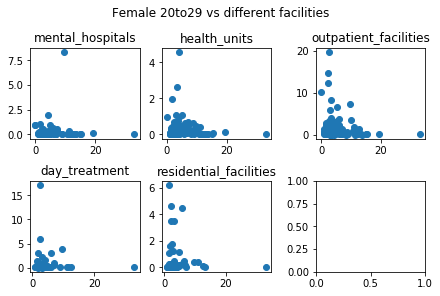

<Figure size 1440x720 with 0 Axes>

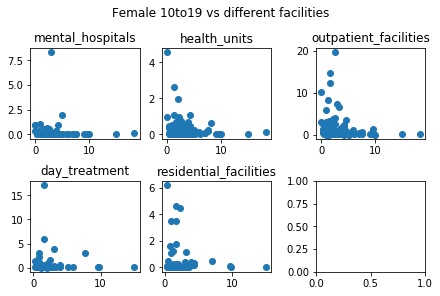

<Figure size 1440x720 with 0 Axes>

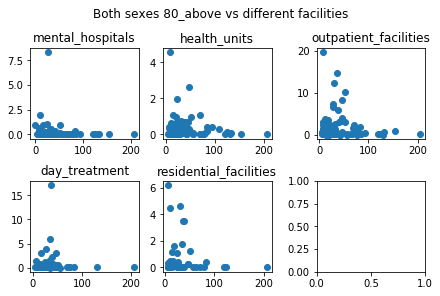

<Figure size 1440x720 with 0 Axes>

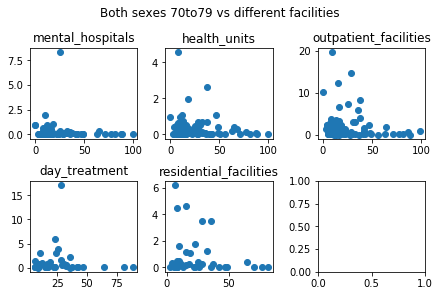

<Figure size 1440x720 with 0 Axes>

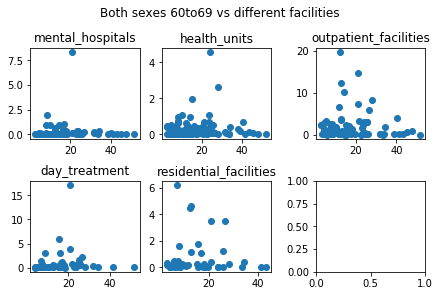

<Figure size 1440x720 with 0 Axes>

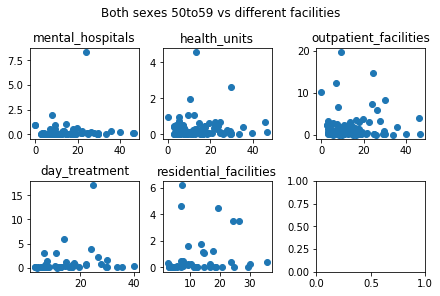

<Figure size 1440x720 with 0 Axes>

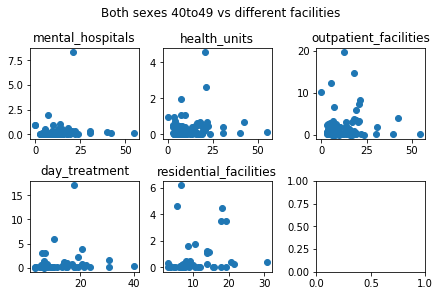

<Figure size 1440x720 with 0 Axes>

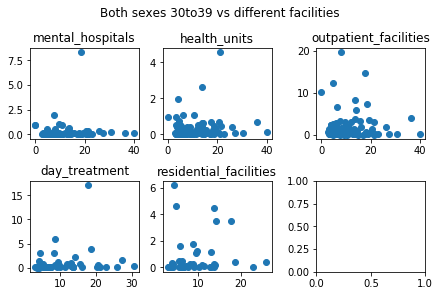

<Figure size 1440x720 with 0 Axes>

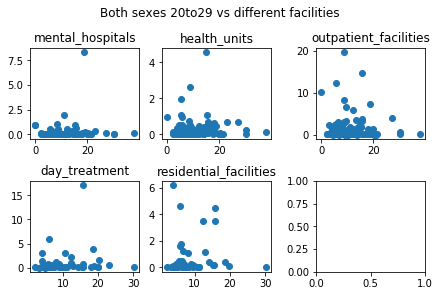

<Figure size 1440x720 with 0 Axes>

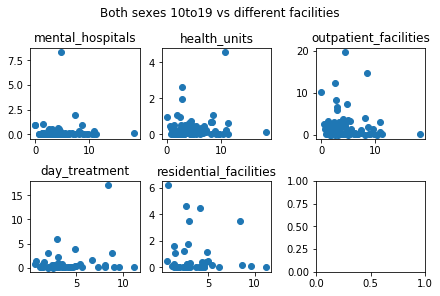

In [12]:
# plot the suicide rate vs different facilities for analysis
ALL_SEX = top_suicide_rates_country_dataframe["sex"].unique()
ALL_AGE_RANGES = ["80_above", "70to79", "60to69", "50to59", "40to49", "30to39", "20to29", "10to19"]
ALL_FACILITIES = ["mental_hospitals", "health_units", "outpatient_facilities", "day_treatment", "residential_facilities"]

for sex in ALL_SEX:
	for age_range in ALL_AGE_RANGES:
		plt.figure(figsize=(20,10))
		fig, axs = plt.subplots(nrows=2, ncols=3, constrained_layout=True)
		fig.figsize=(20,10)
		facilities_index = 0	# use for control the location of the plot
		for facility in ALL_FACILITIES:
			x_index = math.floor(facilities_index / 3)
			y_index = facilities_index % 3
			subplot = axs[x_index, y_index]
			subplot.scatter(suicide_rates_facilities_dataframe[suicide_rates_facilities_dataframe["sex"] == sex][age_range], suicide_rates_facilities_dataframe[suicide_rates_facilities_dataframe["sex"] == sex][facility])
			subplot.set_title("{0}".format(facility))
			#subplot.xlabel("{0} {1} suicide Rate (%)".format(sex, age_range))
			#subplot.ylabel("{0}".format(facility))
			plt.suptitle("{0} {1} vs different facilities".format(sex, age_range))
			facilities_index = facilities_index + 1

		plt.show()